In [1]:
import os
import urllib.request as request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# filename, headers = request.urlretrieve(
#                 url="https://github.com/krishnaik06/DNA-Sequencing-Classifier/raw/master/human_data.txt",
#                 filename="human_data.txt"
#             )

In [2]:
df = pd.read_table("human_data.txt")

In [3]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [4]:
df['kmers'] = df.apply(lambda x: getKmers(x['sequence']), axis=1)
df = df.drop('sequence', axis=1)
df.head()

,class,kmers
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [5]:
X_data = list(df['kmers'])
for item in range(len(X_data)):
    X_data[item] = ' '.join(X_data[item])
    
y_data = df.iloc[:, 0].values   

In [6]:
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(X_data)

<Axes: xlabel='class'>

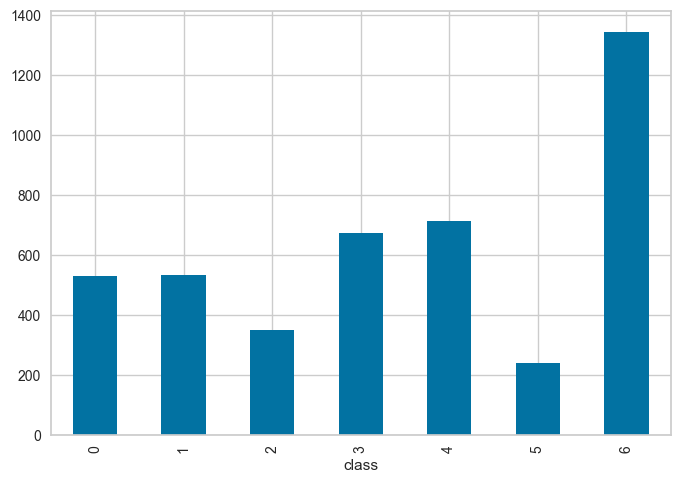

In [7]:
df['class'].value_counts().sort_index().plot.bar()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [10]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
